### Model Training

##### 1.1 Import Python Libraries

In [240]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import Data

In [241]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Presprocessing the data for modeling 
* X & Y variables

In [242]:
df['total_score']=df.loc[:,['math_score','reading_score','writing_score']].sum(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [243]:
X=df.drop(columns='total_score',axis=1)
#X=df.drop(columns='math_score',axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [244]:
Y=df['total_score']
#Y=df['math_score']
Y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

#### Data Transformation
* Categorical features - onehot encoding
* Numerical features - Standard Scalar

In [245]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns
oneh_trans=OneHotEncoder()
num_trans=StandardScaler()

pre_process=ColumnTransformer( [ ('OneHotEd',oneh_trans,cat_features),('stdscalar',num_trans,num_features)])

In [246]:
X=pre_process.fit_transform(X)

In [247]:
X.shape

(1000, 20)

#### Train Test split

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [249]:
X_train.shape ,X_test.shape

((800, 20), (200, 20))

#### Create an evaluation function to give all metrices 
* mea -> mean absolute error (sum(1 to n) |actual - predicted|)/n
* mse -> mean of squared error (sum(1 to n) (actual - predicted)2)/n
* rmse -> square root of mean of squared error (sqrt(sum(1 to n) (actual - predicted)2)/n)
* r2 square -> coefficient of determination (1- (sum of squared residuals/sum ofsquared total))

In [250]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Model building

In [251]:
from sklearn.ensemble import AdaBoostRegressor
models= {
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'catboost':CatBoostRegressor(),
    'xgboost':XGBRegressor(),
    'AdaBoost':AdaBoostRegressor(),

}
model_list=[]
r2_list = []

# Train the model
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train) 

    # Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred =model.predict(X_test)  

    # Evaluate the model
    model_train_mae ,model_train_rmse, model_train_r2 = evaluate_model(Y_train,y_train_pred)
    #=evaluation_metrices(Y_train,y_train_pred)
    #=evaluation_metrices(Y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(Y_test,y_test_pred)
    #=evaluation_metrices(Y_test,y_test_pred)
    #=evaluation_metrices(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Train dataset')
    print("- Root Mean Squared Error: {0:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {0:.4f}".format(model_train_mae))
    print("- R2 Score: {0:.4f}".format(model_train_r2))

    print("-"*40)

    print('Model performance for Test dataset')
    print("- Root Mean Squared Error: {0:.4f}".format(model_test_rmse))
    #print("- Mean Absolute Error: %.4f"%model_test_mae)
    print("- Mean Absolute Error: {0:.4f}".format(model_test_mae))
    print(" ->R2 Score:{0:.4f} ".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("-"*35)
    print("\n")


Linear Regression
Model performance for Train dataset
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------------
Model performance for Test dataset
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
 ->R2 Score:1.0000 
-----------------------------------


Ridge
Model performance for Train dataset
- Root Mean Squared Error: 0.0241
- Mean Absolute Error: 0.0195
- R2 Score: 1.0000
----------------------------------------
Model performance for Test dataset
- Root Mean Squared Error: 0.0264
- Mean Absolute Error: 0.0201
 ->R2 Score:1.0000 
-----------------------------------


Lasso
Model performance for Train dataset
- Root Mean Squared Error: 1.0644
- Mean Absolute Error: 0.8505
- R2 Score: 0.9994
----------------------------------------
Model performance for Test dataset
- Root Mean Squared Error: 1.1139
- Mean Absolute Error: 0.8764
 ->R2 Score:0.9994 
-----------------------------------


Decision Tree
Model

#### Results

In [252]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
0,Linear Regression,1.000000
1,Ridge,1.000000
2,Lasso,0.999357
8,xgboost,0.996425
4,Random Forest,0.993609
7,catboost,0.993457
3,Decision Tree,0.984075
9,AdaBoost,0.978330
5,KNN,0.956016
6,SVR,0.761127


#### Linear Regression

In [253]:
LM=LinearRegression(fit_intercept=True)
LM=LM.fit(X_train,Y_train)
y_pred=LM.predict(X_test)
score=r2_score(Y_test,y_pred)*100
print("Accuracy of Linear Regression Model is :{:.2f}".format(score))

Accuracy of Linear Regression Model is :100.00


#### Plot predicted values & Actual values

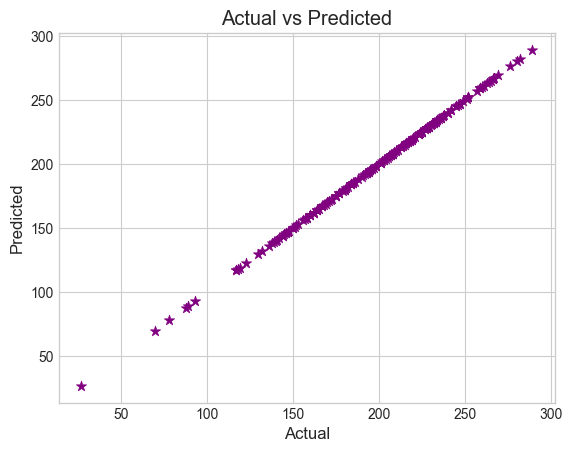

In [264]:
pl.scatter(Y_test,y_pred,color='purple',marker="*",s=60)
pl.title("Actual vs Predicted")
pl.xlabel("Actual")
pl.ylabel("Predicted")
pl.show()

#### Difference in actual values and predicted values

In [267]:
diff=pd.DataFrame({'actual_val':Y_test,'predicted_val':y_pred,'differece':Y_test-y_pred}).sort_values(by='differece',ascending=False)
diff

,actual_val,predicted_val,differece
59,27,27.0,3.126388e-13
327,70,70.0,2.557954e-13
76,78,78.0,2.557954e-13
363,93,93.0,2.273737e-13
787,89,89.0,1.989520e-13
...,...,...,...
820,267,267.0,-1.136868e-13
439,259,259.0,-1.136868e-13
749,257,257.0,-1.136868e-13
451,289,289.0,-1.136868e-13
